In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the input datasets
companies = pd.read_csv("./companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("./rounds2.csv", encoding = "ISO-8859-1")

In [12]:
# Ensure Dataset is loaded properly
companies.head()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# checkpoint1

In [18]:
#upon Checking the data it looks like the primary key permalink has mixed case in rounds2 dataframe..lets do some cleaning
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [20]:
unique_comp_rounds2 = len(rounds2['company_permalink'].unique())
print("The number of unique companies in rounds2 dataframe is : "+ str(unique_comp_rounds2) )

The number of unique companies in rounds2 dataframe is : 66370


In [21]:
unique_comp_companies = len(companies['permalink'].unique())
print("The number of unique companies in companies dataframe is : "+ str(unique_comp_companies) )

The number of unique companies in companies dataframe is : 66368


In [22]:
#Since both have unequal number of rows, let us doa left merge
#use left_on and right_on as the column names are different in rounds2 and company dataframe
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [29]:
#find the number of observations in master_frame
#master_frame.head()
observationcount = master_frame.shape[0]
print("The number of observations in master_frame dataframe is : "+ str(observationcount) )

The number of observations in master_frame dataframe is : 114949


In [30]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [31]:
#find percentage of missing values to decide on data cleaning approach
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [32]:
#Remove unwanted columns which have missing values too
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [33]:
#remove observations which do not have data from raised_amount_usd as it contributesto 17.39%
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [35]:
#remove these observations as there are also siginificant fields in analysis
master_frame=master_frame[~master_frame.category_list.isnull()]
master_frame=master_frame[~master_frame.country_code.isnull()]

In [36]:
#check again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [38]:
dataloss= len(master_frame.index)/114942

0.7702058429468776

# checkpoint2

In [44]:
#group by funding round type

master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)



funding_round_type
post_ipo_debt            1.694518e+08
secondary_market         8.443853e+07
private_equity           7.393849e+07
post_ipo_equity          6.607706e+07
debt_financing           1.716765e+07
undisclosed              1.589166e+07
venture                  1.172422e+07
grant                    4.512698e+06
product_crowdfunding     1.353227e+06
convertible_note         1.337187e+06
angel                    9.715739e+05
seed                     7.477937e+05
equity_crowdfunding      5.098980e+05
non_equity_assistance    4.807534e+05
Name: raised_amount_usd, dtype: float64

In [45]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         45850000.0
private_equity           20000000.0
post_ipo_debt            19900000.0
post_ipo_equity          12262852.5
venture                   5000000.0
undisclosed               1100000.0
debt_financing            1096653.0
angel                      414906.0
seed                       300000.0
convertible_note           300000.0
grant                      225000.0
product_crowdfunding       211500.0
equity_crowdfunding         85000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

In [46]:
#lets do some plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

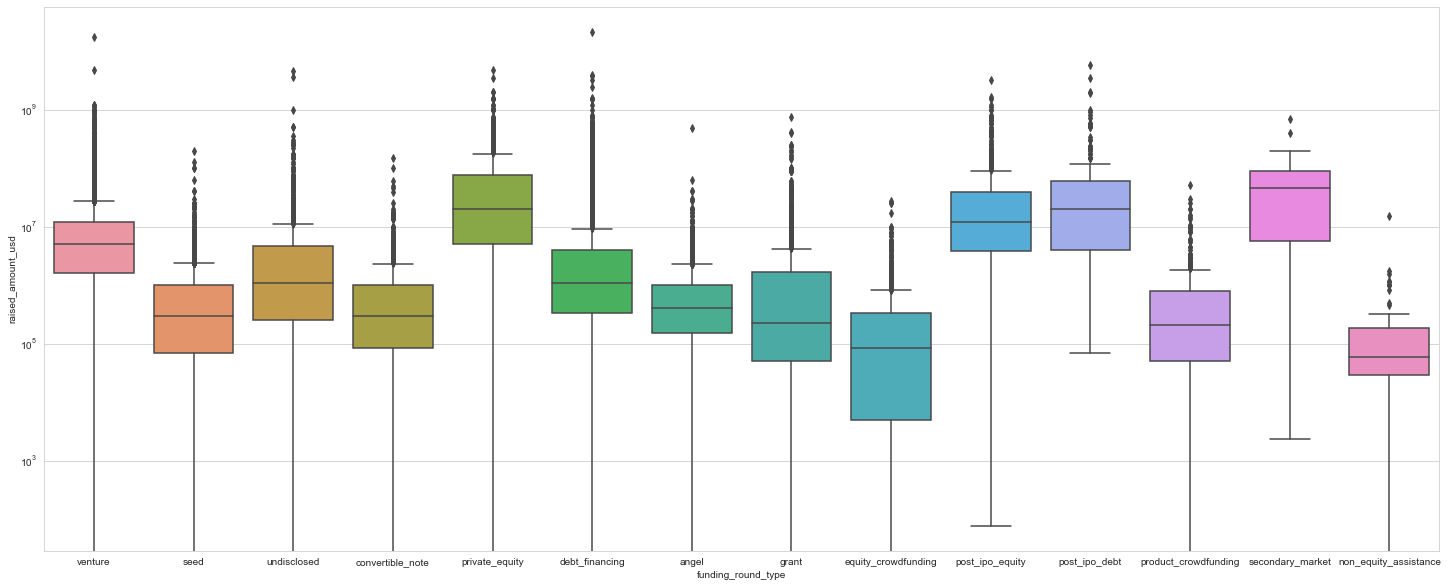

In [49]:
#boxplot across various categories of funding round type
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

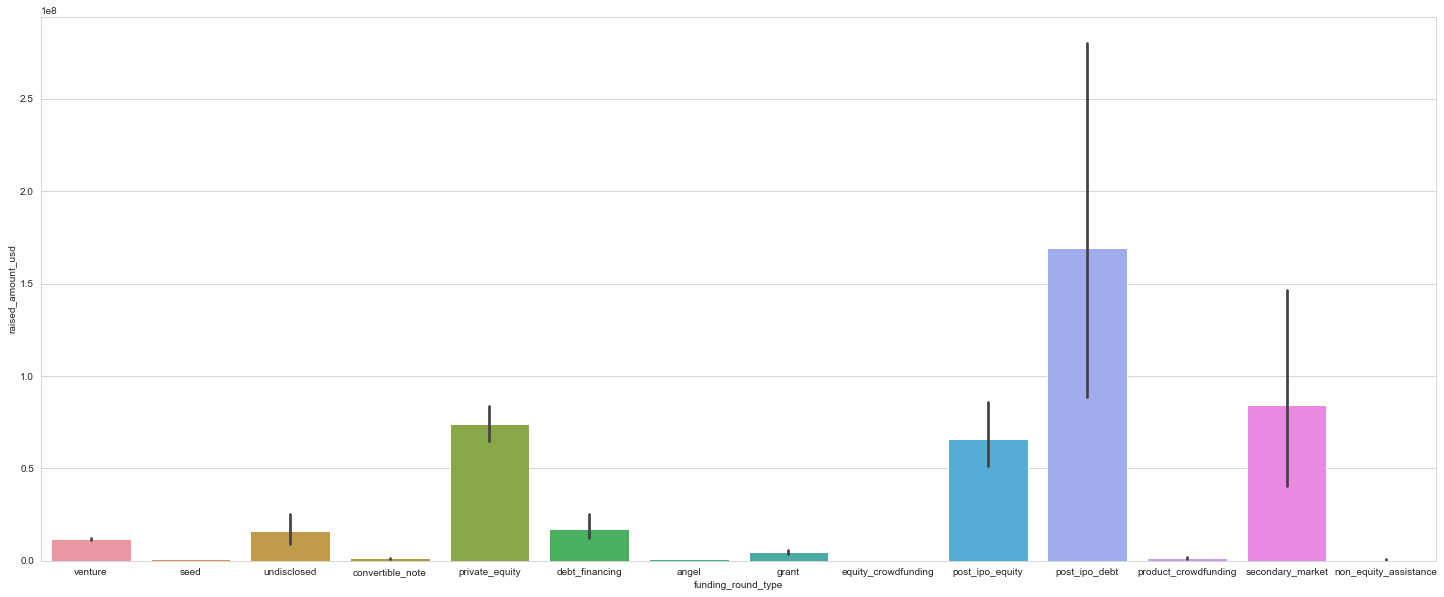

In [50]:
plt.figure(figsize=(25, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

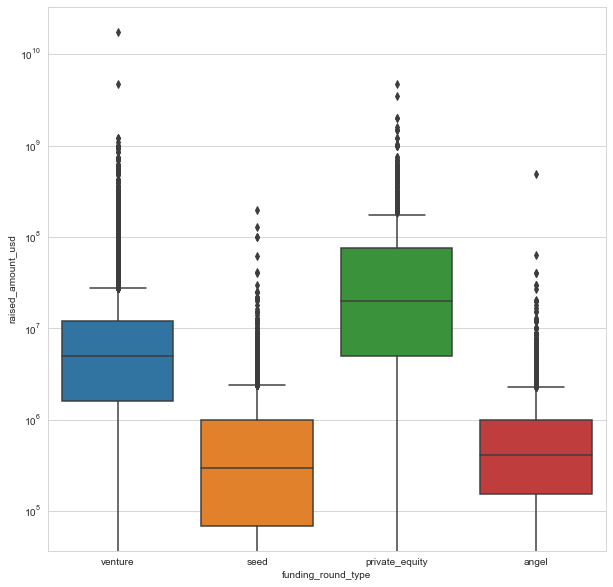

In [52]:
#since Angel, Venture, seed and private equity is what is spark funds interested upon
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
#boxplot for the four categories
plt.figure(figsize=(10, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

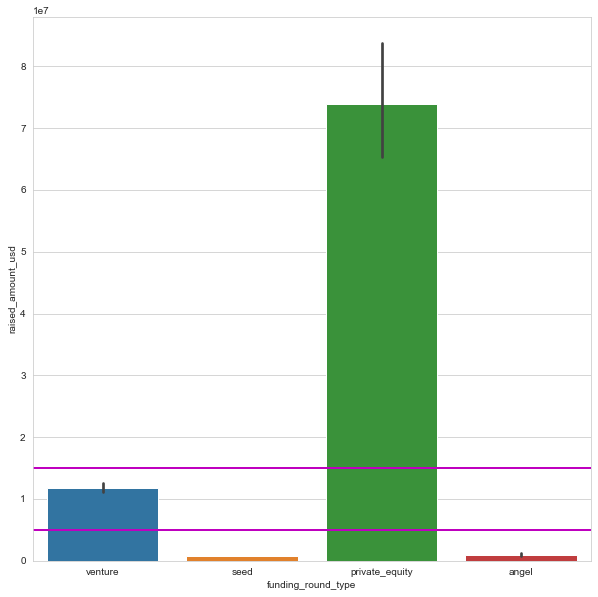

In [53]:
#barplot for four funding types
plt.figure(figsize=(10, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#lets draw a line to represent 5M to 15 M
plt.axhline(y=5000000, linewidth=2, color = 'm')
plt.axhline(y=15000000, linewidth=2, color = 'm')
plt.show()
#The above plot clearly shows that Venture is the type of investment which lies between 5M to 15M as expected by Spark Funds
#and hence Venture would best suit Spark investments

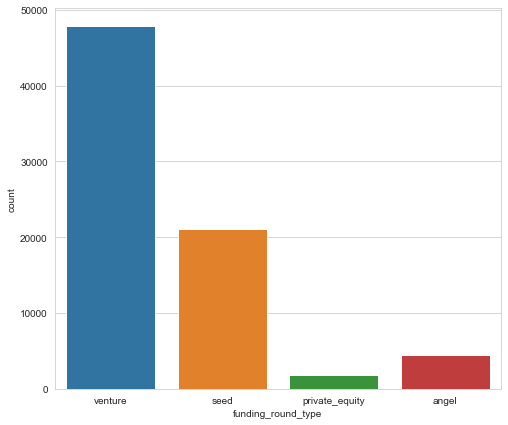

In [56]:
# Plotting count across the 4 investment types
plt.figure(figsize=(8, 7))
sns.countplot(x="funding_round_type", data=master_frame)
plt.show()

In [55]:
#Answer table2.1
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

# From the above graphs and data, it is clearly evident venture is the type of investment which is between 5M to 15 M and hence Venture would be the choice of investment type for Spark Funds.

In [72]:
#Filtering venture investment type
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]
venture_df.shape

(47809, 13)

In [59]:
#Describe Venture Dataframe
venture_df.describe()

,raised_amount_usd
count,4.780900e+04
mean,1.172422e+07
std,8.821571e+07
min,0.000000e+00
25%,1.600000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


# checkpoint3

In [74]:
# Set the display to have the format readable and avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format
#Get the top 9 countires which received highest funding
venture_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA   420,068,029,342.00
CHN    39,338,918,773.00
GBR    20,072,813,004.00
IND    14,261,508,718.00
CAN     9,482,217,668.00
FRA     7,226,851,352.00
ISR     6,854,350,477.00
DEU     6,306,921,981.00
JPN     3,167,647,127.00
Name: raised_amount_usd, dtype: float64

In [113]:
#Filtering the top 9 countries
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [78]:
#Cleaning the category list to eliminate null values
top9=top9[~top9.category_list.isnull()]

In [114]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [79]:
top9.describe()

,raised_amount_usd
count,"44,118.00"
mean,"11,940,234.34"
std,"91,553,164.71"
min,0.00
25%,"1,687,304.25"
50%,"5,000,000.00"
75%,"12,000,000.00"
max,"17,600,000,000.00"


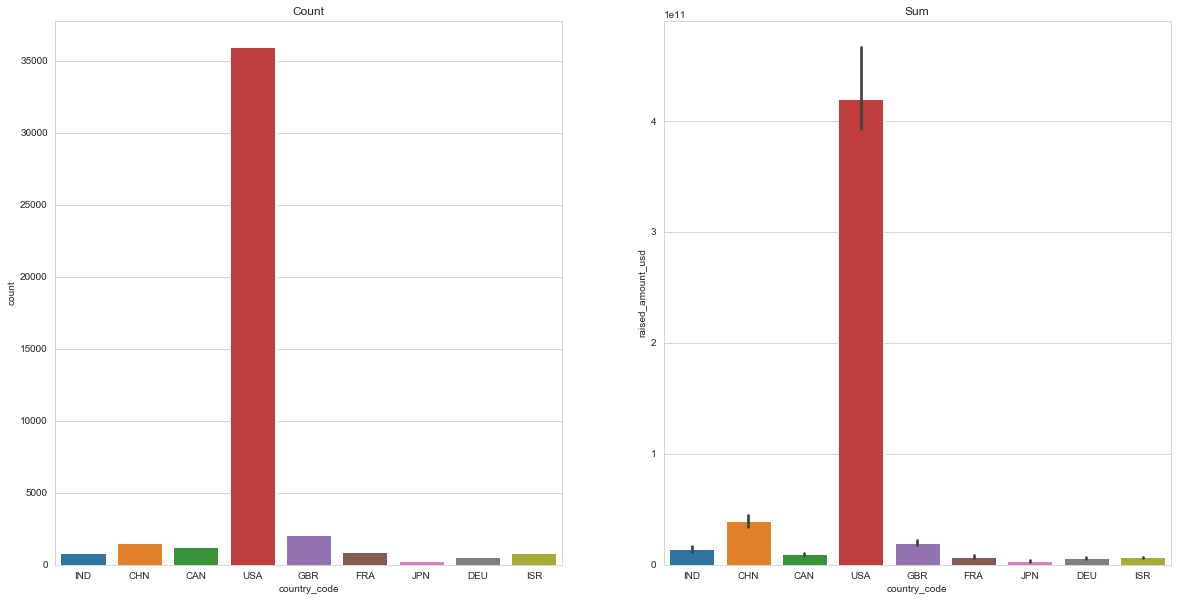

In [80]:
# Plotting sum across top 9 country_code 

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()


# Based on analysis from web , USA, GBR and IND are the top three English Speaking Countires in the top 9 list.

# checkpoint4

In [82]:
#Load the mapping.csv
mapping = pd.read_csv("./mapping.csv", encoding = "ISO-8859-1")
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [116]:
#Calculating the primary sector
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
#checking if the primary sector was added
top9.head()
top9.shape


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


In [86]:
#removing null values from mapping dataframe
mapping=mapping[~mapping.category_list.isnull()]

In [87]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [96]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [ ]:
#correct the values of category list
mapping['category_list'] = mapping['category_list'].str.replace("0","na")

In [95]:
#correct Enterprise2.0 as it got updated due to the above operation
mapping['category_list'] = np.where(mapping['category_list'] == "Enterprise 2.na", "Enterprise 2.0",mapping['category_list'])

In [99]:
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping.head(100)

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
95,Certification Test,Automotive & Sports,0
96,Charities,Automotive & Sports,0
97,Charity,Automotive & Sports,0
98,Charter Schools,Automotive & Sports,0


In [100]:
mapping = mapping[mapping.value != 0]

In [105]:
mapping.head(5)

,primary_sector,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


In [102]:
#renaming the column to merge with the top9 Countries dataframe
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [ ]:
#drop the value column
mapping = mapping.drop('value', axis=1)

In [120]:
#setting up the string to lowercase before merging
top9['primary_sector'] = top9['primary_sector'].str.lower()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
#merge the mapping dataframe with top9 dataframe
top9 = pd.merge(top9, mapping, how='left', on='primary_sector', indicator=True)

In [124]:
top9.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
44113,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,"14,219,999.00",/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors,both
44114,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,"555,016.00",/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors,both
44115,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,"140,500.00",/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,e-commerce,Others,both
44116,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,"8,500,000.00",/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,biotechnology,Cleantech / Semiconductors,both
44117,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,"1,587,301.00",/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,22,Beijing,Beijing,enterprise software,Others,both


In [125]:
#let us check how many did not get merged with both the data
left_only = top9[top9['_merge'] != 'both']

In [128]:
len(left_only)

11

In [129]:
#only 11 row did not get merged and hence have main_sector as naN.. Removing the rows
top9=top9[~(top9['main_sector'].isnull())]

In [130]:
left_only_after_cleaning = top9[top9['_merge'] != 'both']
len(left_only_after_cleaning)

0

# checkpoint5

Sector Analysis for the top three English Speaking Countries

In [132]:
#D1 - Filtering data for USA
D1=top9[top9['country_code']=='USA']

In [133]:
#D1 - Filtering for funds falling between 5M to 15M
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [149]:
D1.shape

(12063, 16)

In [137]:
#lets check some data
D1['raised_amount_usd'].count()
D1['raised_amount_usd'].sum()

107757097294.0

In [138]:
#Grouping by Main Sector for USA
USA_BY_SECTOR = D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

In [140]:
USA_BY_SECTOR.rename(columns={'count':'Number of investments','sum':'Total Amount Invested'}, inplace=True)

In [146]:
#Top 3 main sector by number of investments in USA
USA_BY_SECTOR.sort_values(by = ['Number of investments'],ascending=False)

,Number of investments,Total Amount Invested
main_sector,,
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"
Cleantech / Semiconductors,2350,"21,633,430,822.00"
"News, Search and Messaging",1583,"13,971,567,428.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
Entertainment,591,"5,099,197,982.00"
Automotive & Sports,167,"1,454,104,361.00"


In [142]:
#Total Number of investments for USA
D1['raised_amount_usd'].count()

12063

In [143]:
#Total Amount Invested for USA
D1['raised_amount_usd'].sum()

107757097294.0

In [147]:
top_sector_by_company = D1[D1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [148]:
#Top Company which received highest funding in others main category in USA
top_sector_by_company

permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
                                         ...     
/organization/capton                 5,000,000.00
/organization/capital-teas           5,000,000.00
/organization/campus-quad            5,000,000.00
/organization/campus-explorer        5,000,000.00
/organization/netqos                 5,000,000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

In [150]:
Second_top_sector_by_company = D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [151]:
#Top Company which received highest funding in Social, FInance, Analytics, Advertising Main Category in USA
Second_top_sector_by_company

permalink
/organization/shotspotter        67,933,006.00
/organization/demandbase         63,000,000.00
/organization/intacct            61,800,000.00
/organization/netbase            60,600,000.00
/organization/lotame             59,700,000.00
                                      ...     
/organization/logi-analytics      5,000,000.00
/organization/smartturn           5,000,000.00
/organization/fractal-sciences    5,000,000.00
/organization/amtec-lcc           5,000,000.00
/organization/initiate-systems    5,000,000.00
Name: raised_amount_usd, Length: 1847, dtype: float64

In [152]:
#D2 - Filtering data for GBR
D2=top9[top9['country_code']=='GBR']

In [153]:
#D2 - Filtering for funds falling between 5M to 15M for GBR
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

In [154]:
#Total Number of investments for GBR
D2['raised_amount_usd'].count()

621

In [156]:
#Total Amount Invested for GBR
D2['raised_amount_usd'].sum()

5379078691.0

In [159]:
#Grouping by Main Sector for GBR
GBR_BY_SECTOR = D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
#Top 3 main sector by number of investments
GBR_BY_SECTOR.rename(columns={'count':'Number of investments','sum':'Total Amount Invested'}, inplace=True)
GBR_BY_SECTOR.sort_values(by = ['Number of investments'],ascending=False)

,Number of investments,Total Amount Invested
main_sector,,
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"
Cleantech / Semiconductors,130,"1,163,990,056.00"
"News, Search and Messaging",73,"615,746,235.00"
Entertainment,56,"482,784,687.00"
Manufacturing,42,"361,940,335.00"
Health,24,"214,537,510.00"
Automotive & Sports,16,"167,051,565.00"


In [160]:
top_sector_by_company_GBR = D2[D2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [161]:
#Top company in the top main sector in Great Britain
top_sector_by_company_GBR

permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
                                             ...     
/organization/parcelgenie                5,000,000.00
/organization/vector-watch               5,000,000.00
/organization/thefilter                  5,000,000.00
/organization/udex                       5,000,000.00
/organization/bacula-systems             5,000,000.00
Name: raised_amount_usd, Length: 120, dtype: float64

In [162]:
Second_top_sector_by_company_GBR = D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [163]:
#Top Company in Second Top Main Sector in GBR
Second_top_sector_by_company_GBR

permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
/organization/imagini                 28,550,000.00
/organization/marketinvoice           25,553,007.00
                                           ...     
/organization/moo                      5,000,000.00
/organization/rangespan                5,000,000.00
/organization/tamoco                   5,000,000.00
/organization/the-fizzback-group       5,000,000.00
/organization/duedil                   5,000,000.00
Name: raised_amount_usd, Length: 104, dtype: float64

In [164]:
#D3 - Filtering data for IND
D3=top9[top9['country_code']=='IND']

In [165]:
#D3 - Filtering for funds falling between 5M to 15M for IND
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

In [166]:
#Total Number of investments for IND
D3['raised_amount_usd'].count()

328

In [167]:
#Total Amount Invested for IND
D3['raised_amount_usd'].sum()

2949543602.0

In [168]:
#Grouping by Main Sector for IND
IND_BY_SECTOR = D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
#Top 3 main sector by number of investments
IND_BY_SECTOR.rename(columns={'count':'Number of investments','sum':'Total Amount Invested'}, inplace=True)
IND_BY_SECTOR.sort_values(by = ['Number of investments'],ascending=False)

,Number of investments,Total Amount Invested
main_sector,,
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"
"News, Search and Messaging",52,"433,834,545.00"
Entertainment,33,"280,830,000.00"
Manufacturing,21,"200,900,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Health,19,"167,740,000.00"
Automotive & Sports,13,"136,900,000.00"


In [169]:
top_sector_by_company_IND = D3[D3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [170]:
# Top Company in Top Main Category
top_sector_by_company_IND

permalink
/organization/firstcry-com          39,000,000.00
/organization/myntra                38,000,000.00
/organization/commonfloor           32,900,000.00
/organization/pepperfry-com         28,000,000.00
/organization/itzcash-card-ltd      25,000,000.00
                                         ...     
/organization/reznext                5,000,000.00
/organization/voonik-com             5,000,000.00
/organization/vedantu-innovations    5,000,000.00
/organization/securens               5,000,000.00
/organization/liases-foras           5,000,000.00
Name: raised_amount_usd, Length: 88, dtype: float64

In [171]:
Second_top_sector_by_company_IND = D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

In [172]:
#Top Company in Second Top Main Sector
Second_top_sector_by_company_IND

permalink
/organization/manthan-systems                                50,700,000.00
/organization/komli-media                                    28,000,000.00
/organization/shopclues-com                                  25,000,000.00
/organization/intarvo                                        21,900,000.00
/organization/grameen-financial-services                     21,556,050.00
/organization/bankbazaar                                     19,000,000.00
/organization/microland                                      18,300,000.00
/organization/eka-software-solutions                         16,000,000.00
/organization/qyuki                                          15,400,000.00
/organization/financial-information-network-operations-pvt   15,000,000.00
/organization/travelguru                                     15,000,000.00
/organization/shiram-credit                                  15,000,000.00
/organization/apnaloan                                       15,000,000.00
/organization/c

In [178]:
Stats_df = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
Stats_df=Stats_df.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

Stats_df=Stats_df.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [180]:
Stats_df.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising",both
1,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,"11,999,347.00",/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,service providers,Others,both
2,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,"14,000,000.00",/organization/170-systems,170 Systems,Software,acquired,USA,MA,Boston,Bedford,software,Others,both
3,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,"5,000,000.00",/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others,both
4,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,"10,000,000.00",/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others,both
5,/organization/1bog,/funding-round/3d2463c9b97f32b3be8747fbd629961f,venture,11-02-2010,"5,000,000.00",/organization/1bog,One Block Off the Grid (1BOG),Clean Technology|Residential Solar,closed,USA,CA,SF Bay Area,San Francisco,clean technology,Cleantech / Semiconductors,both
6,/organization/1stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,"15,000,000.00",/organization/1stdibs,1stdibs,E-Commerce,operating,USA,NY,New York City,New York,e-commerce,Others,both
7,/organization/21e6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,"5,050,000.00",/organization/21e6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,CA,SF Bay Area,San Francisco,big data,"Social, Finance, Analytics, Advertising",both
8,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,"10,000,000.00",/organization/22nd-century-group,22nd Century Group,Biotechnology,ipo,USA,NY,NY - Other,Clarence,biotechnology,Cleantech / Semiconductors,both
9,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,"9,000,000.00",/organization/23andme,23andMe,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,biotechnology,Cleantech / Semiconductors,both


In [183]:
#Grouping by Main Sector and country
STATS_BY_SECTOR_COUNTRY = Stats_df.pivot_table(values = 'raised_amount_usd',index = ['main_sector','country_code'], aggfunc = {'sum','count'})
STATS_BY_SECTOR_COUNTRY.rename(columns={'count':'Number of investments','sum':'Total Amount Invested'}, inplace=True)
STATS_BY_SECTOR_COUNTRY.sort_values(by = ['country_code'],ascending=False)

,,Number of investments,Total Amount Invested
main_sector,country_code,,
Cleantech / Semiconductors,USA,2350,"21,633,430,822.00"
Others,USA,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",USA,2714,"23,807,376,964.00"
"News, Search and Messaging",IND,52,"433,834,545.00"
Others,IND,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",IND,60,"550,549,550.00"
Cleantech / Semiconductors,GBR,130,"1,163,990,056.00"
Others,GBR,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",GBR,133,"1,089,404,014.00"


In [182]:
STATS_BY_SECTOR_COUNTRY

count               sum
main_sector                             country_code                         
Cleantech / Semiconductors              GBR             130  1,163,990,056.00
                                        USA            2350 21,633,430,822.00
News, Search and Messaging              IND              52    433,834,545.00
Others                                  GBR             147  1,283,624,289.00
                                        IND             110  1,013,409,507.00
                                        USA            2950 26,321,007,002.00
Social, Finance, Analytics, Advertising GBR             133  1,089,404,014.00
                                        IND              60    550,549,550.00
                                        USA            2714 23,807,376,964.00

# Check point 6 

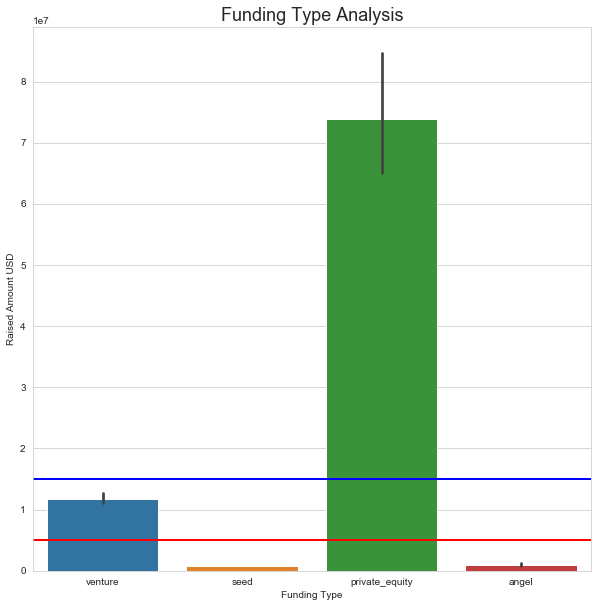

In [176]:
#barplot for four funding types
plt.figure(figsize=(10, 10))
a=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
a.set(xlabel='Funding Type', ylabel='Raised Amount USD')
a.set_title('Funding Type Analysis',fontsize =18)
#lets draw a line to represent 5M to 15 M
plt.axhline(y=5000000, linewidth=2, color = 'r')
plt.axhline(y=15000000, linewidth=2, color = 'b')
plt.show()
#The above plot clearly shows that Venture is the type of investment which lies between 5M to 15M as expected by Spark Funds
#and hence Venture would best suit Spark investments

Above Graph very evidently proves Venture should be the choice of investment type

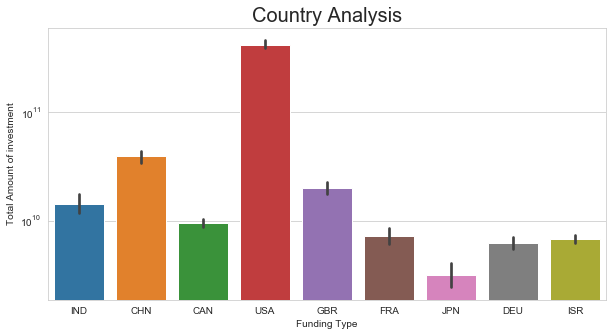

In [177]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Total Amount of investment')
c.set_title('Country Analysis',fontsize =20)
plt.show()

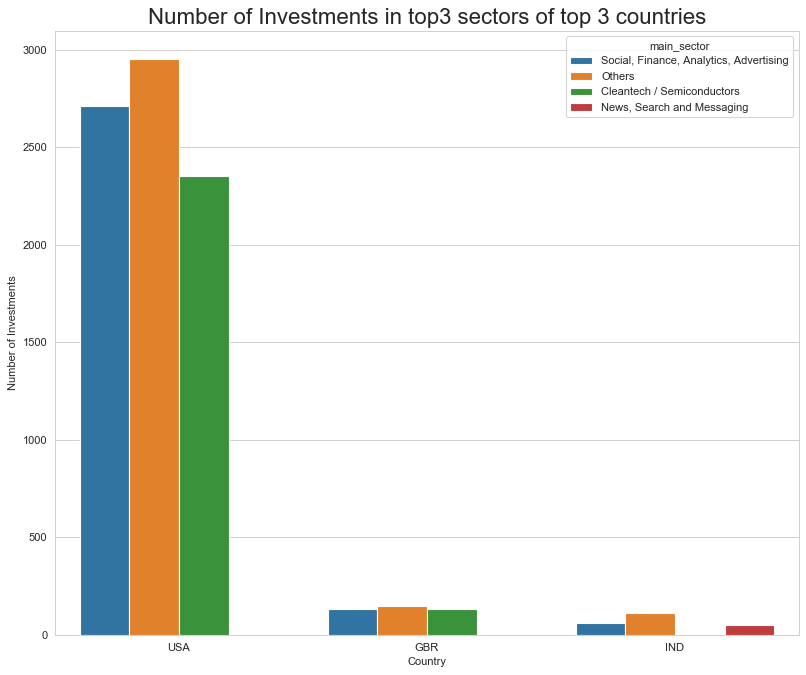

In [192]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

graph=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=Stats_df,estimator = lambda x: len(x))
graph.set(xlabel='Country', ylabel='Number of Investments')
graph.set_title('Number of Investments in top3 sectors of top 3 countries',fontsize =20)
plt.show()